# # Chit No-11
Implement K-Nearest Neighbors algorithm on diabetes.csv dataset. Compute confusion matrix, accuracy, error rate, precision and recall on the given dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/DELL/Desktop/Engineering/BE/Sem 1/LP III/ML/5/diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
def visulize(x,y,xlabel):
    plt.figure(figsize=(16,10))
    plt.hist([x,y],color=['red','green'],label=["Age","Outcome"])
    plt.xlabel(xlabel,fontsize=30)
    plt.ylabel("Outcome",fontsize=30)
    plt.legend()

In [5]:
age_0=df[df["Outcome"]==0]["Age"]
age_1=df[df["Outcome"]==1]["Age"]

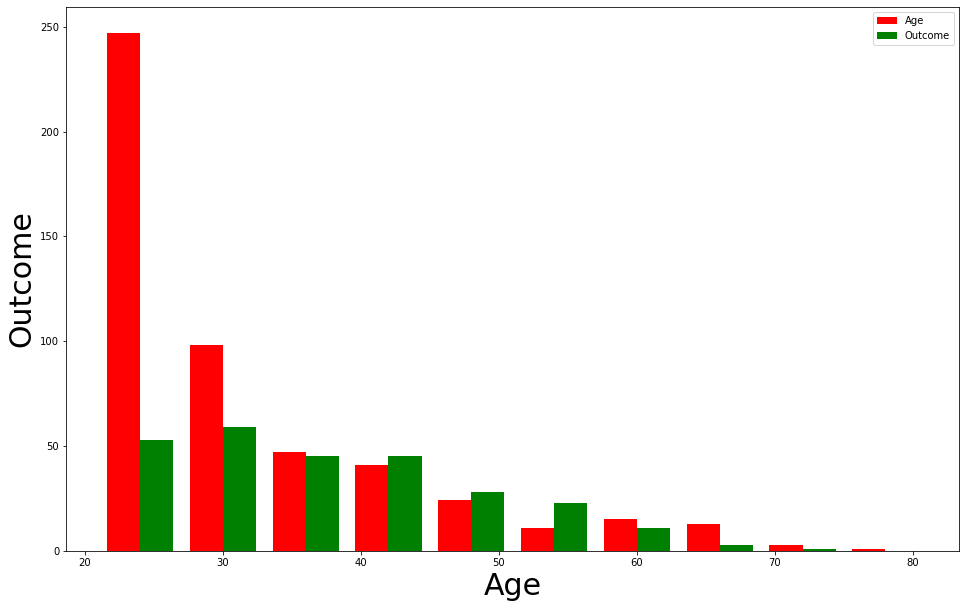

In [7]:
visulize(age_0,age_1,"Age")

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [13]:
x=df.drop(columns=['Outcome'])
y=df['Outcome']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [17]:
x_train.shape

(537, 8)

In [18]:
x_test.shape

(231, 8)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [22]:
from sklearn import metrics

In [27]:
metrics.accuracy_score(y_test,y_pred)

0.7272727272727273

In [32]:
cs=metrics.confusion_matrix(y_test,y_pred)

In [30]:
pd.crosstab(y_test,y_pred,rownames=["Predicted"],colnames=["True"],margins=True)

True,0,1,All
Predicted,,,
0,136,15,151
1,48,32,80
All,184,47,231


In [34]:
total_missclassified=cs[0,1]+cs[1,0]
print(total_missclassified)

63


In [36]:
total_examples=cs[0,1]+cs[1,0]+cs[0,0]+cs[1,1]
total_examples

231

In [38]:
print("Error Rate",1-metrics.accuracy_score(y_test,y_pred))

Error Rate 0.2727272727272727


In [42]:
metrics.classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.74      0.90      0.81       151\n           1       0.68      0.40      0.50        80\n\n    accuracy                           0.73       231\n   macro avg       0.71      0.65      0.66       231\nweighted avg       0.72      0.73      0.71       231\n'

In [45]:
print("Precision ",metrics.precision_score(y_test,y_pred))

Precision  0.6808510638297872


In [46]:
print("Recall ",metrics.recall_score(y_test,y_pred))

Recall  0.4
